In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    ReLU,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [2]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)


In [3]:
import os
import pandas as pd

audio_dir = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

# List to store metadata for each audio file
meta_data = []

# Iterate over all files in the directory
for file_name in os.listdir(audio_dir):
    # Check if the file is an wav file
    if file_name.endswith(".wav"):
        # Extract class name from file name (assuming file names are formatted as "class_name_file_number.wav")
        class_name = file_name.split("_")[0].replace("-", " ").title()  # Extract class name and format
        # Append metadata to the list
        meta_data.append({"file_name": file_name, "class_name": class_name})

# Print the metadata list to check if it's populated correctly
print(meta_data)

# Convert list of dictionaries to pandas DataFrame
meta_data = pd.DataFrame(meta_data)

# Print the first few rows of the DataFrame to check its structure
print(meta_data.head())
meta_data = pd.DataFrame(meta_data)

print(os.listdir(audio_dir))

[]
Empty DataFrame
Columns: []
Index: []
['Crow', 'Parrot', 'Pigeon', 'Sparrow']


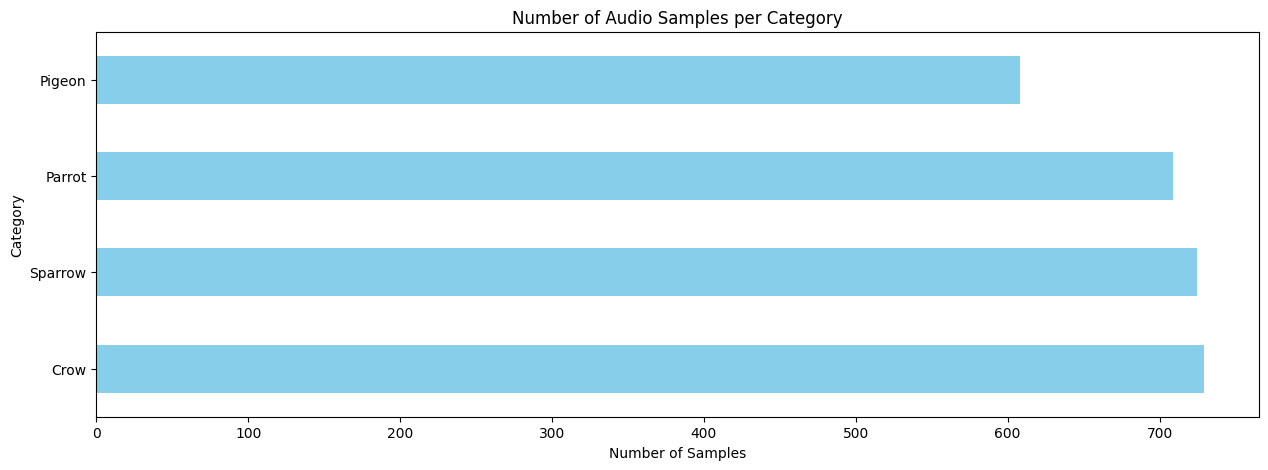

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the audio files
audio_dir = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

# List to store metadata for each audio file
meta_data = []

# Iterate over all directories and subdirectories
for root, dirs, files in os.walk(audio_dir):
    # Iterate over each file in the current directory
    for file_name in files:
        # Check if the file is an wav file
        if file_name.endswith(".wav"):
            # Extract class name from the directory name
            class_name = os.path.basename(root)  # Extract class name from directory name
            # Append metadata to the list
            meta_data.append({"file_name": file_name, "class_name": class_name})

# Convert list of dictionaries to pandas DataFrame
meta_data = pd.DataFrame(meta_data)

# Group by class and count the number of files in each class
class_counts = meta_data["class_name"].value_counts()

# Plotting
plt.figure(figsize=(15, 5))
class_counts.plot(kind='barh', color='skyblue')
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()

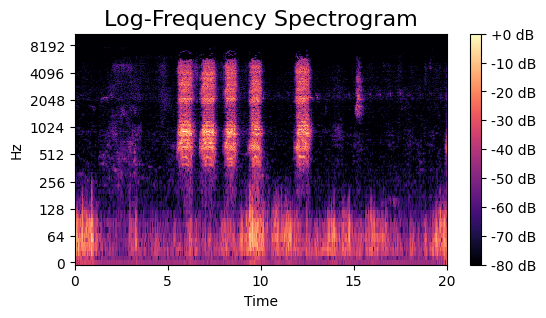

In [5]:
def spec(path):
    # Load the audio file
    audio_sig, sampling_rate = librosa.load(path, sr=None)
    
    # Compute the Fast Fourier Transform (FFT)
    audio_fft = np.fft.fft(audio_sig)
    spectrum = np.abs(audio_fft)
    f = np.linspace(0, sampling_rate, len(spectrum))
    
    # Consider only the first half of the spectrum (symmetry of FFT for real signals)
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    # Compute the Short-Time Fourier Transform (STFT)
    audio_stft = librosa.stft(audio_sig)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Log-Frequency Spectrogram', fontsize=16)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.savefig('LogFS.png')
    plt.show()

# Correct path with proper slashes
path = r"C:\Users\mausu\Downloads\Birds_sounds\Crow\segment_30 (6).wav"

spec(path)


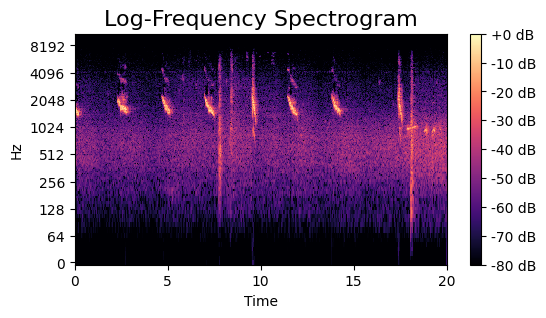

In [6]:
def spec(path):
    # Load the audio file
    audio_sig, sampling_rate = librosa.load(path, sr=None)
    
    # Compute the Fast Fourier Transform (FFT)
    audio_fft = np.fft.fft(audio_sig)
    spectrum = np.abs(audio_fft)
    f = np.linspace(0, sampling_rate, len(spectrum))
    
    # Consider only the first half of the spectrum (symmetry of FFT for real signals)
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    # Compute the Short-Time Fourier Transform (STFT)
    audio_stft = librosa.stft(audio_sig)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Log-Frequency Spectrogram', fontsize=16)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.savefig('LogFS.png')
    plt.show()

# Correct path with proper slashes
path = r"C:\Users\mausu\Downloads\Birds_sounds\Sparrow\segment_100 (5).wav"
spec(path)


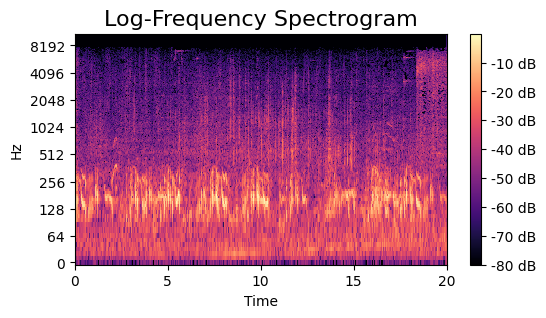

In [7]:
def spec(path):
    # Load the audio file
    audio_sig, sampling_rate = librosa.load(path, sr=None)
    
    # Compute the Fast Fourier Transform (FFT)
    audio_fft = np.fft.fft(audio_sig)
    spectrum = np.abs(audio_fft)
    f = np.linspace(0, sampling_rate, len(spectrum))
    
    # Consider only the first half of the spectrum (symmetry of FFT for real signals)
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    # Compute the Short-Time Fourier Transform (STFT)
    audio_stft = librosa.stft(audio_sig)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Log-Frequency Spectrogram', fontsize=16)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.savefig('LogFS.png')
    plt.show()

# Correct path with proper slashes
path = r"C:\Users\mausu\Downloads\Birds_sounds\Pigeon\segment_10 (11).wav"

spec(path)


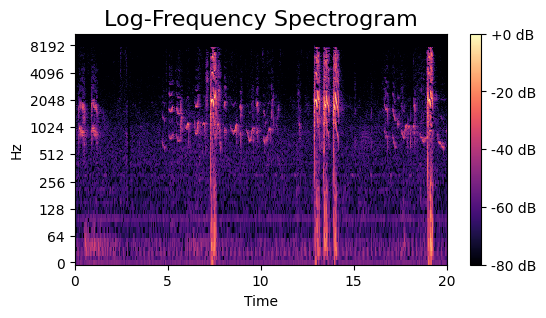

In [8]:
def spec(path):
    # Load the audio file
    audio_sig, sampling_rate = librosa.load(path, sr=None)
    
    # Compute the Fast Fourier Transform (FFT)
    audio_fft = np.fft.fft(audio_sig)
    spectrum = np.abs(audio_fft)
    f = np.linspace(0, sampling_rate, len(spectrum))
    
    # Consider only the first half of the spectrum (symmetry of FFT for real signals)
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    # Compute the Short-Time Fourier Transform (STFT)
    audio_stft = librosa.stft(audio_sig)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Log-Frequency Spectrogram', fontsize=16)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.savefig('LogFS.png')
    plt.show()

# Correct path with proper slashes
path = r"C:\Users\mausu\Downloads\Birds_sounds\Parrot\segment_100 (13).wav"
spec(path)


In [9]:
import os
import pandas as pd

#define the directory containing the audio files
base_path = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

#List to store metadata for each audio files
meta_data = []

#Iterate over all directories and subdirectories 
for root, dirs, files in os.walk(base_path):
    #iterate over each files in the current directory
    for file_name in files:
        #check if the file is an MP3 File or WAV file
        if  file_name.endswith(".wav"):
            #Extract class name from the directory name
            class_name = os.path.basename(root) 
            #Append metadata to the list 
            meta_data.append({"file_name":file_name,"class_name":class_name})
#Convert list of dictionaries to pandas Dataframe 
pd_data = pd.DataFrame(meta_data)

#Display the first few rows of the DataFrame
print(pd_data.head())

            file_name class_name
0   segment_0 (1).wav       Crow
1  segment_0 (10).wav       Crow
2  segment_0 (11).wav       Crow
3  segment_0 (12).wav       Crow
4  segment_0 (13).wav       Crow


In [10]:
import os

# Define the directory containing the folders named after birds
base_directory = r"C:\Users\mausu\Downloads\Birds_sounds"

# List all subdirectories in the base directory
bird_names = [name for name in os.listdir(base_directory)
              if os.path.isdir(os.path.join(base_directory, name))]

print(bird_names)


['Crow', 'Parrot', 'Pigeon', 'Sparrow']


In [11]:
import os
import pandas as pd

#define the directory containing the audio files
base_path = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

#List to store metadata for each audio files
meta_data = []

#Iterate over all directories and subdirectories 
for root, dirs, files in os.walk(base_path):
    #iterate over each files in the current directory
    for file_name in files:
        #check if the file is an WAV file
        if file_name.endswith(".wav"):
            #Extract class name from the directory name
            class_name = os.path.basename(root) 
            #Append metadata to the list 
            meta_data.append({"file_name":file_name,"class_name":class_name})
#Convert list of dictionaries to pandas Dataframe 
pd_data = pd.DataFrame(meta_data)

#Define the classes you want to filter
my_classes =['Crow', 'Parrot', 'Pigeon', 'Sparrow']
#Map class names to class IDS 
map_class_to_id = {'Crow':0, 'Parrot':1, 'Pigeon':2, 'Sparrow':3}
#Filter the dataframe based on specified classes
filtered_pd = pd_data[pd_data['class_name'].isin(my_classes)]

#Map class names to class IDs and add as a new column 'target'
class_id = filtered_pd['class_name'].apply(lambda name: map_class_to_id.get(name))
filtered_pd = filtered_pd.assign(target=class_id)

#get the full path of the audio files 
full_path = filtered_pd['file_name'].apply(lambda row: os.path.join(base_path,row[1],row))
filtered_pd = filtered_pd.assign(file_name=full_path)

#Display the first few rows of the filtered dataframe
print(filtered_pd.head())

                                           file_name class_name  target
0  C:\Users\mausu\Downloads\Birds_sounds\e\segmen...       Crow       0
1  C:\Users\mausu\Downloads\Birds_sounds\e\segmen...       Crow       0
2  C:\Users\mausu\Downloads\Birds_sounds\e\segmen...       Crow       0
3  C:\Users\mausu\Downloads\Birds_sounds\e\segmen...       Crow       0
4  C:\Users\mausu\Downloads\Birds_sounds\e\segmen...       Crow       0


In [12]:
grouped_classes = filtered_pd.groupby("target")["class_name"].unique()

print(grouped_classes)

target
0       [Crow]
1     [Parrot]
2     [Pigeon]
3    [Sparrow]
Name: class_name, dtype: object


In [13]:
import os
import librosa
import numpy as np
from tqdm import tqdm

#define the directory containing the audio files
dir = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

#List to store extracted features
extracted = []

#iterate over subfolders
for subfolder in os.listdir(dir):
    subfolder_path = os.path.join(dir,subfolder)

    #check if the item in the base directory is a directory itself
    if os.path.isdir(subfolder_path):
        print(f'Processing files in subfolder: {subfolder_path}')

        #iterate over files in the subfolder
        for file_name in tqdm(os.listdir(subfolder_path)):
            #check if the file is an WAV file
            if file_name.endswith(".wav"):
                file_path = os.path.join(subfolder_path,file_name)

                #Load audio files and extract features
                audio,sample_rate = librosa.load(file_path)
                audio_stft = librosa.stft(audio)
                S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
                scaled_feature = np.mean(S_dB.T,axis = 0)
                
                #Append extracted features along with class label
                extracted.append([scaled_feature, subfolder])
print("Extraction completed")                

Processing files in subfolder: C:\Users\mausu\Downloads\Birds_sounds\Crow


  0%|          | 0/729 [00:00<?, ?it/s]

100%|██████████| 729/729 [00:38<00:00, 19.04it/s]


Processing files in subfolder: C:\Users\mausu\Downloads\Birds_sounds\Parrot


100%|██████████| 709/709 [00:33<00:00, 21.22it/s]


Processing files in subfolder: C:\Users\mausu\Downloads\Birds_sounds\Pigeon


100%|██████████| 608/608 [00:21<00:00, 27.69it/s]


Processing files in subfolder: C:\Users\mausu\Downloads\Birds_sounds\Sparrow


100%|██████████| 725/725 [00:27<00:00, 25.92it/s]


Extraction completed


In [14]:
import os
print(os.listdir("C:\\Users\\mausu\\Downloads\\Birds_sounds"))

['Crow', 'Parrot', 'Pigeon', 'Sparrow']


In [15]:
plt.rcParams["figure.figsize"] = (4,5)
plt.rcParams["figure.dpi"] = 200

In [16]:
#Create a new dataframe
extracted_df = pd.DataFrame(extracted,columns=["feature","class"])

extracted_df.to_pickle("extracted_df.pkl")
extracted_df.head()

,feature,class
0,"[-66.00951, -70.264565, -77.99602, -77.28977, ...",Crow
1,"[-63.54523, -68.50928, -78.04324, -77.3357, -7...",Crow
2,"[-62.811825, -67.64405, -77.34494, -76.53543, ...",Crow
3,"[-48.700188, -54.127903, -68.069626, -66.88473...",Crow
4,"[-64.10972, -69.66528, -76.68101, -76.25603, -...",Crow


In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load your DataFrame
final = pd.read_pickle("extracted_df.pkl")

# Prepare features and labels
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())

# Initialize LabelEncoder and encode labels
le = LabelEncoder()
Y = to_categorical(le.fit_transform(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)



In [18]:
# Print the shapes of the datasets before reshaping
print("Shape of X_train before reshaping:", X_train.shape)
print("Shape of X_test before reshaping:", X_test.shape)
print("Shape of X:", X.shape)


Shape of X_train before reshaping: (2216, 1025)
Shape of X_test before reshaping: (555, 1025)
Shape of X: (2771, 1025)


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Number of classes
num_classes = len(my_classes)

# Number of samples in the test set
num_samples = len(y_test)

# Probability of randomly guessing each class
class_probability = 1.0 / num_classes

# Generate random predictions with equal probability for each class
random_predictions = np.random.choice(num_classes, size=num_samples)

# Convert one-hot encoded labels back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix for random predictions
random_conf_matrix = confusion_matrix(y_test_labels, random_predictions)

# Calculate sensitivity, specificity, and accuracy for random predictions
random_sensitivity = np.diag(random_conf_matrix) / random_conf_matrix.sum(axis=1)
random_specificity = np.diag(random_conf_matrix) / (random_conf_matrix.sum(axis=1) - random_conf_matrix.diagonal() + random_conf_matrix.sum(axis=0) - np.diag(random_conf_matrix))
random_accuracy = accuracy_score(y_test_labels, random_predictions) * 100

# Create a list to store results for each class and overall accuracy
random_results_list = []

# Iterate over classes
for i, class_name in enumerate(my_classes):
    random_results_list.append({
        "Class": class_name,
        "Sensitivity": random_sensitivity[i],
        "Specificity": random_specificity[i]
    })

# Calculate overall sensitivity, specificity, and accuracy
random_overall_sensitivity = np.mean(random_sensitivity)
random_overall_specificity = np.mean(random_specificity)

# Append overall results
random_results_list.append({
    "Class": "Overall",
    "Sensitivity": random_overall_sensitivity,
    "Specificity": random_overall_specificity
})

# Convert the list of dictionaries into a DataFrame
random_results_df = pd.DataFrame(random_results_list)

# Print the results for the untrained model
print("Results for Untrained Model (Random Guessing):")
print(random_results_df)

# Print overall accuracy for the untrained model
print("Overall Accuracy (Random Guessing):", random_accuracy)


Results for Untrained Model (Random Guessing):
     Class  Sensitivity  Specificity
0     Crow     0.234899     0.156951
1   Parrot     0.213333     0.154589
2   Pigeon     0.276786     0.165775
3  Sparrow     0.270833     0.178082
4  Overall     0.248963     0.163849
Overall Accuracy (Random Guessing): 24.684684684684687


In [20]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
import time

# Define the directory containing the audio files
base_path = "C:\\Users\\mausu\\Downloads\\Birds_sounds"

# List to store metadata for each audio file
meta_data = []

# Iterate over all directories and subdirectories
for root, dirs, files in os.walk(base_path):
    # Iterate over each file in the current directory
    for file_name in files:
        # Check if the file is a WAV file
        if file_name.endswith(".wav"):
            # Extract class name from the directory name
            class_name = os.path.basename(root) 
            # Append metadata to the list 
            meta_data.append({"file_name": os.path.join(root, file_name), "class_name": class_name})

# Convert list of dictionaries to pandas DataFrame 
pd_data = pd.DataFrame(meta_data)

# Define the classes you want to filter
my_classes = ['Crow', 'Parrot', 'Pigeon', 'Sparrow']

# Filter the DataFrame based on specified classes
filtered_pd = pd_data[pd_data['class_name'].isin(my_classes)]

# Map class names to class IDs
map_class_to_id = {'Crow': 0, 'Parrot': 1, 'Pigeon': 2, 'Sparrow': 3}

# Map class names to class IDs and add as a new column 'target'
class_id = filtered_pd['class_name'].apply(lambda name: map_class_to_id.get(name))
filtered_pd = filtered_pd.assign(target=class_id)

# Prepare features and labels
X = []
y = []
for index, row in filtered_pd.iterrows():
    audio_data, sample_rate = librosa.load(row['file_name'], sr=None)
    audio_stft = librosa.stft(audio_data)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    scaled_feature = np.mean(S_dB.T, axis=0)
    X.append(scaled_feature)
    y.append(row['target'])

X = np.array(X)
y = np.array(y)

# Initialize LabelEncoder and encode labels
le = LabelEncoder()
Y = to_categorical(le.fit_transform(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape X_train and X_test
X_train = X_train.reshape(X_train.shape[0], 41, 5, 5)
X_test = X_test.reshape(X_test.shape[0], 41, 5, 5)

# Define the learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Define the CNN model
CNN2D_Model = Sequential([
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(41, 5, 5)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.4),
    Dense(4, activation="softmax")
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
CNN2D_Model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Define the learning rate scheduler and early stopping callbacks
lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
t0 = time.time()
history = CNN2D_Model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=50,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler, early_stopping]
)
train_time = round(time.time() - t0, 3)
print("Training completed in {} seconds".format(train_time))

# Save the trained model
CNN2D_Model.save("Model3_updated.keras")
print("Updated CNN2D Model Saved")


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3043 - loss: 20.9485 - val_accuracy: 0.8324 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6988 - loss: 0.7594 - val_accuracy: 0.8559 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8317 - loss: 0.4580 - val_accuracy: 0.9477 - val_loss: 0.2111 - learning_rate: 0.0010
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8102 - loss: 0.4590 - val_accuracy: 0.9784 - val_loss: 0.1706 - learning_rate: 0.0010
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8765 - loss: 0.3281 - val_accuracy: 0.9784 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9046 - loss: 0.2465 - val_accuracy: 0.9712 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9107 - loss: 0.2589 -

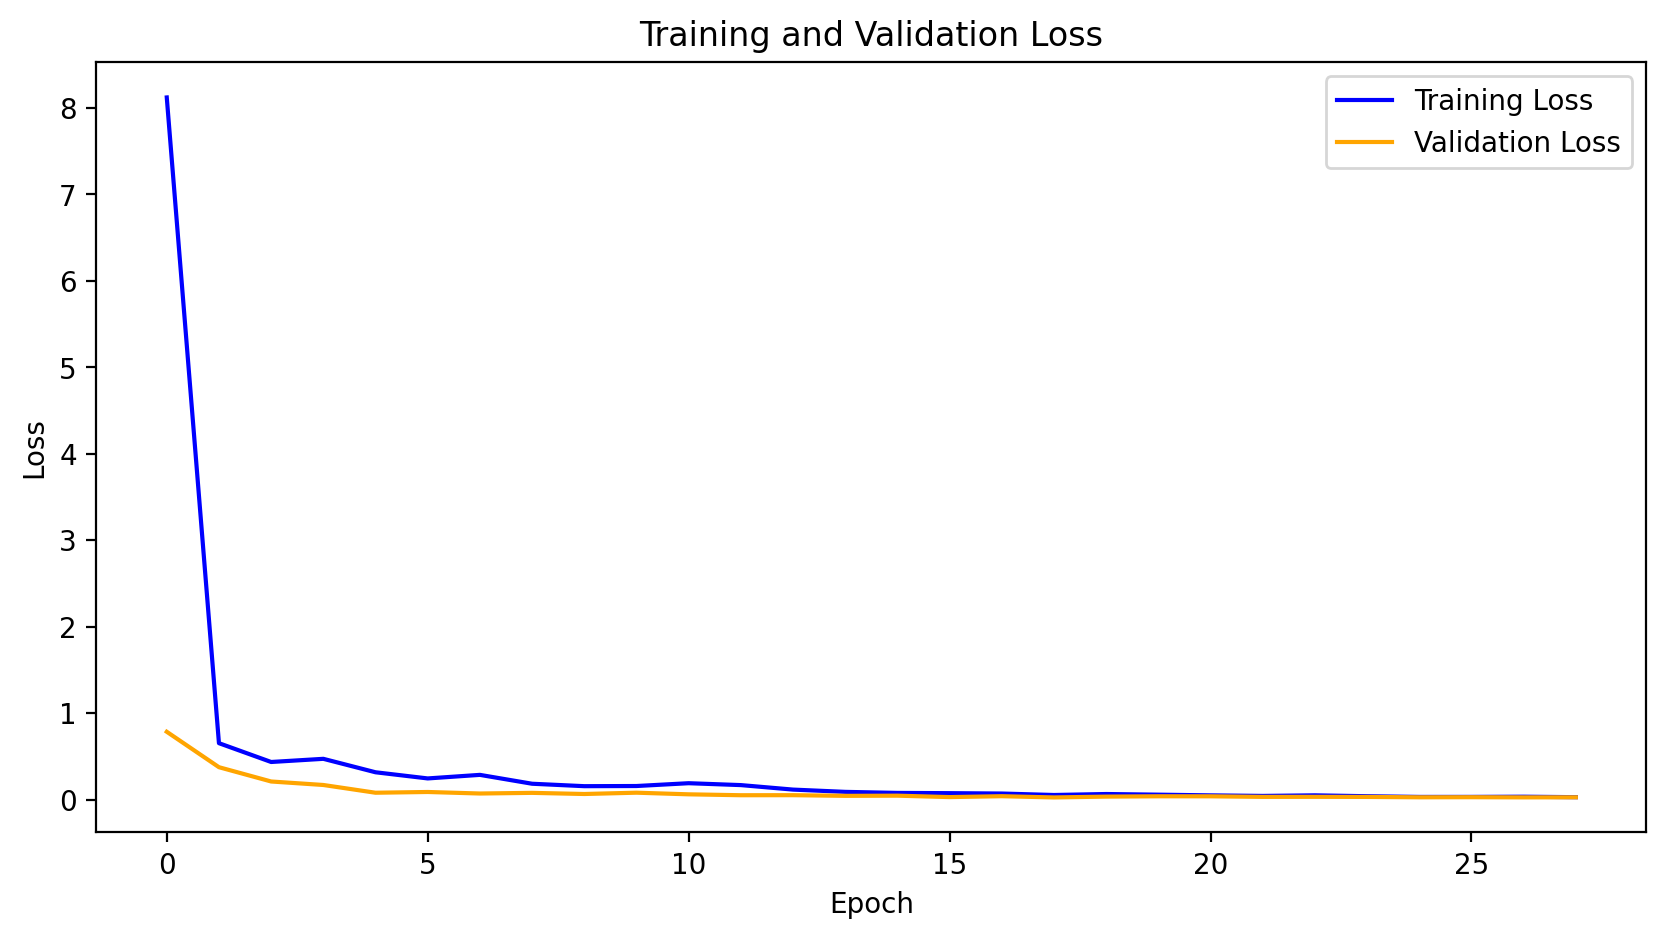

In [21]:
import matplotlib.pyplot as plt

# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


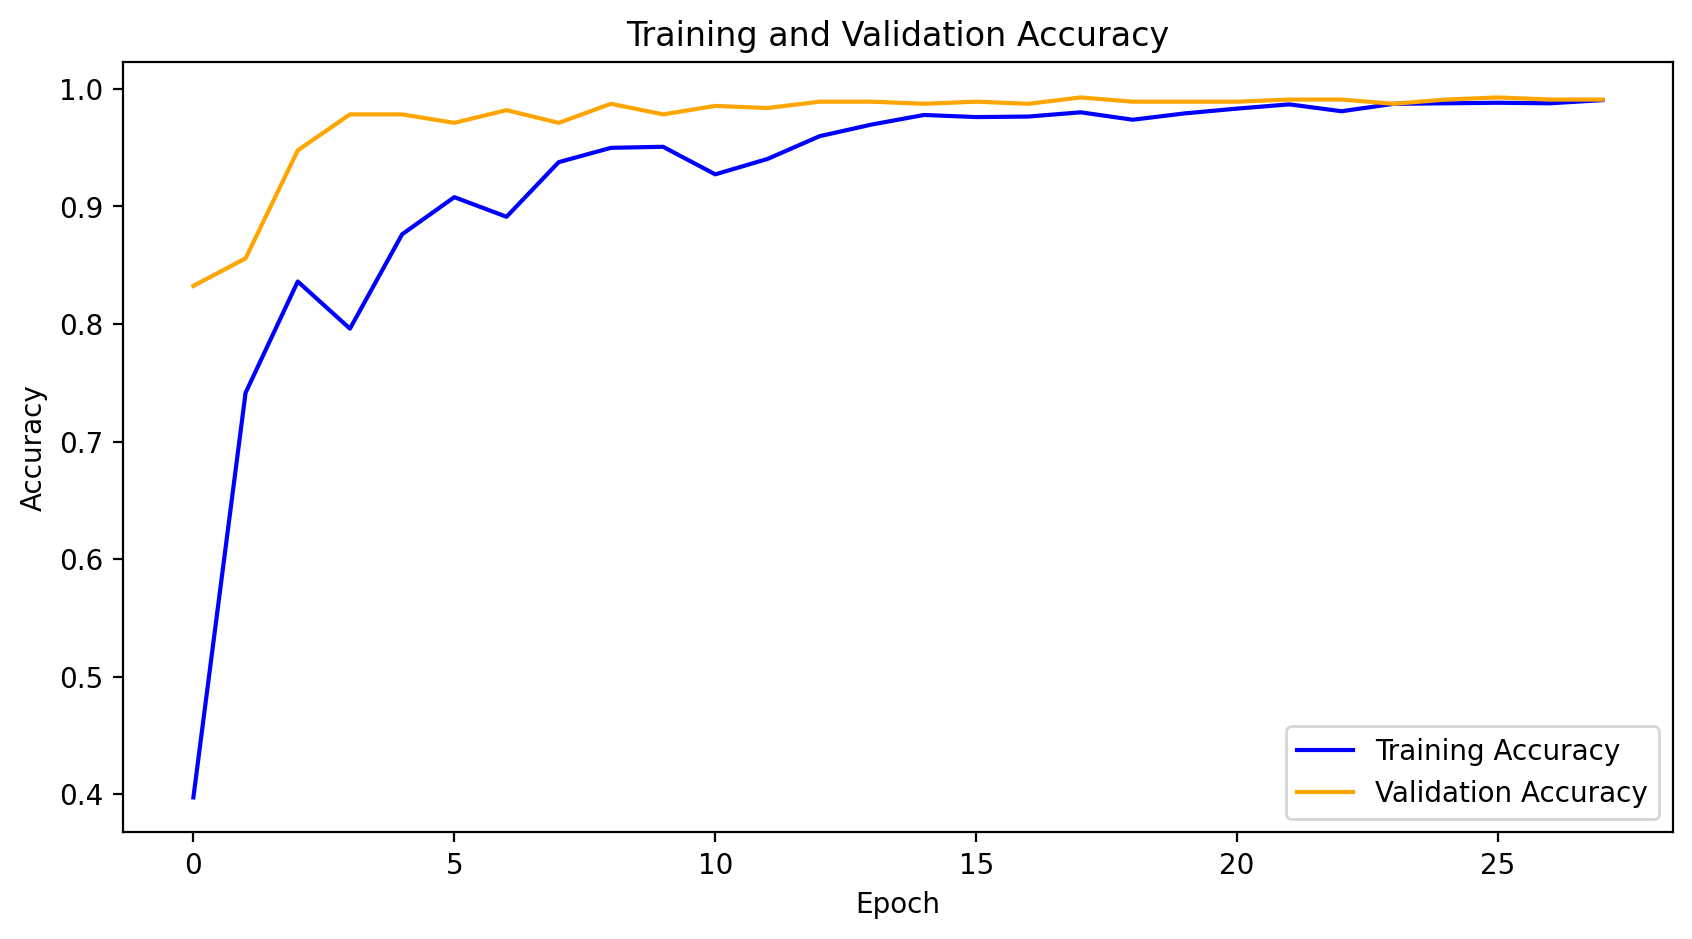

In [22]:
# Get training and validation accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
import numpy as np
import librosa
from IPython.display import Audio
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Evaluate the model on test data
acc_m3 = CNN2D_Model.evaluate(X_test, y_test, verbose=0)

# Predict on test data
t0 = time.time()
y_pred_m3 = CNN2D_Model.predict(X_test, verbose=0)
pred_m3 = round(time.time() - t0, 3)

# Calculate training time (assuming 'history' is the variable containing training history)
train_time = round(time.time() - t0, 3)  # Calculate the training time separately

# Create a DataFrame to store results
log_entry = pd.DataFrame({
    "Model": ["CNN2D"],
    "Accuracy": [acc_m3[1] * 100],
    "Train Time": [train_time],
    "Prediction Time": [pred_m3]
})

# Append the results to the log DataFrame
log = pd.concat([log, log_entry])


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert one-hot encoded labels back to categorical labels
y_pred_labels = np.argmax(y_pred_m3, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate sensitivity, specificity, and overall accuracy
sensitivity = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
specificity = np.diag(conf_matrix) / (conf_matrix.sum(axis=1) - conf_matrix.diagonal() + conf_matrix.sum(axis=0) - np.diag(conf_matrix))
accuracy = accuracy_score(y_test_labels, y_pred_labels) * 100

# Create a list to store results for each class and overall accuracy
results_list = []

# Iterate over classes
for i, class_name in enumerate(my_classes):
    results_list.append({
        "Class": class_name,
        "Sensitivity": sensitivity[i],
        "Specificity": specificity[i]
    })

# Calculate overall sensitivity, specificity, and accuracy
overall_sensitivity = np.mean(sensitivity)
overall_specificity = np.mean(specificity)

# Append overall results
results_list.append({
    "Class": "Overall",
    "Sensitivity": overall_sensitivity,
    "Specificity": overall_specificity
})

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Print the results
print("Results:")
print(results_df)

# Print overall accuracy
print("Overall Accuracy:", accuracy)


Results:
     Class  Sensitivity  Specificity
0     Crow     0.986577       73.500
1   Parrot     1.000000       50.000
2   Pigeon     1.000000      112.000
3  Sparrow     0.986111       71.000
4  Overall     0.993172       76.625
Overall Accuracy: 99.27927927927928


In [25]:
birds_name={"0":"Crow",
                "1":"Parrot",
                "2":"Pigeon",
                "3":"Sparrow"}



In [30]:
def CNN2D_Prediction():
    file_name = t1.get("1.0","end-1c")
    if "\n" in file_name:
        file_name=file_name.split("\n")[0]
        
    file_name=file_name[1:-1]
    
    # Load the audio file
    audio_data, sample_rate = librosa.load(file_name, sr=None)  # Use sr=None to maintain original sampling rate

    # Compute the Short-Time Fourier Transform (STFT)
    audio_stft = librosa.stft(audio_data)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)

    # Process features to match model input shape
    feature_scaled = np.mean(S_dB.T, axis=0)
    prediction_feature = np.array([feature_scaled]).reshape(1, 41, 5, 5)  # Reshape as needed

    # Predict using the CNN model
    predicted_vector = CNN2D_Model.predict(prediction_feature)
    predicted_class_id = np.argmax(predicted_vector, axis=-1)
    predicted_class = le.inverse_transform(predicted_class_id)

    # If the model's confidence is low, consider it an unknown sound
    confidence_threshold = 0.9  # Adjust as needed
    max_confidence = np.max(predicted_vector)
    if max_confidence < confidence_threshold:
        print("Unknown Sound")
    else:
        # Display the result
        print("CNN2D has predicted the class as -->", predicted_class)

        # Evaluate and print accuracy if needed
        # Assuming y_test and X_test are defined and properly preprocessed
        # Evaluate model accuracy on the entire test set for general accuracy reporting:
        test_loss, test_acc = CNN2D_Model.evaluate(X_test, y_test, verbose=0)
        print(f"Accuracy on test set: {test_acc * 100:.2f}%")
        a ="CNN2D has predicted the class as -->"+ birds_name[str(predicted_class[0])]
        a = birds_name[str(predicted_class[0])]
        print (a)
        
        output=a
        t2.insert('end',output)



# CNN2D_Prediction(file_name)

from tkinter import *
import tkinter as tk
from tkinter import ttk
from PIL import ImageTk, Image      #pip install pillow
# from googletrans import Translator  #pip install googletrans==3.1.0a0
from tkinter import messagebox

root = tk.Tk()
root.title('bird sound recognization')
root.geometry('530x330')
root.maxsize(1120,720)
root.minsize(1120,720)


# def translate():
#         language_1 = t1.get("1.0","end-1c")
#         cl = choose_langauge.get()

#         if language_1 == '':
#                 messagebox.showerror('Language Translator','please fill the box')
#         else:
#                 t2.delete(1.0,'end')
#                 translator = Translator()
#                 output = translator.translate(language_1, dest=cl)
#                 t2.insert('end',output.text)

def clear():
        t1.delete(1.0,'end')
        t2.delete(1.0,'end')
        



# img = ImageTk.PhotoImage(Image.open('translator.png'))
# label = Label(image=img)
# label.place(x=230,y=3)


a = tk.StringVar() 
auto_detect = ttk.Combobox(root, width = 50, textvariable = a, state='readonly',font=('verdana',10,'bold'),) 
  


auto_detect['values'] = (
                          'give path to bird sound', 
                          ) 
  
auto_detect.place(x=30,y=70)
auto_detect.current(0) 
l = tk.StringVar() 
choose_langauge = ttk.Combobox(root, width = 50, textvariable = l, state='readonly',font=('verdana',10,'bold')) 

choose_langauge['values'] = (
                        'bird_name'
                          ) 
  
choose_langauge.place(x=560,y=70)
choose_langauge.current(0) 


t1 = Text(root,width=50,height=25,borderwidth=5,relief=RIDGE)
t1.place(x=10,y=100)

t2 = Text(root,width=50,height=25,borderwidth=5,relief=RIDGE)
t2.place(x=560,y=100)


button = Button(root,text="Match song",relief=RIDGE,borderwidth=3,font=('verdana',10,'bold'),cursor="hand2",command=CNN2D_Prediction)
button.place(x=450,y=630)


clear = Button(root,text="Clear",relief=RIDGE,borderwidth=3,font=('verdana',10,'bold'),cursor="hand2",command=clear)
clear.place(x=450,y=670)

root.mainloop()
#Path usage - "C:\Users\mausu\Downloads\Crow_files\Crow_14\segment_50 (1).wav"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
CNN2D has predicted the class as --> [1]
Accuracy on test set: 99.28%
Parrot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
CNN2D has predicted the class as --> [0]
Accuracy on test set: 99.28%
Crow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
CNN2D has predicted the class as --> [3]
Accuracy on test set: 99.28%
Sparrow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
CNN2D has predicted the class as --> [2]
Accuracy on test set: 99.28%
Pigeon
